In [450]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler , StandardScaler

In [451]:
df =pd.read_csv('Data_example.csv',encoding ='ISO-8859-1')
print(df)
df.info()

       X     Y        Z
0     19  1927      cat
1    NaN  2300      dog
2     15   NaN     bird
3     16  5959      cat
4     16    AB      cat
5    NaN  4594      dog
6     19  1927      cat
7     20  2879  birdËÁÒ
8     21   NaN      NaN
9      0  4096      cat
10     A  6730      cat
11    25     0     bird
12     0  2792      dog
13    33  2575    dog¹¡
14  1000  4959     bird
15    19  1927      cat
16    36  4580      dog
17    40  5869      NaN
18   NaN  4178      dog
19    45   NaN      cat
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X       17 non-null     object
 1   Y       17 non-null     object
 2   Z       18 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [452]:
df.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
df['Z'] = df["Z"].fillna(value=df["Z"].mode()[0])

In [453]:
# # df['X']=df['X'].replace(np.nan, 0)
# df['X'].fillna(df['X'].median(axis=None, numeric_only=None),inplace=True)
# df['Y'].fillna(6730,inplace=True)
# print(df['X'].median(axis=None, level=None, numeric_only=None))
# df

In [454]:
df['X'] = pd.to_numeric(df['X'], errors='coerce')
df['X'] = df['X'].fillna(df['X'].median())
df['X'] = df['X'].astype('int64')
df['Y'] = pd.to_numeric(df['Y'], errors='coerce')
df['Y'] = df['Y'].fillna(df['Y'].median())
df['Y'] = df['Y'].astype('float64')
df

,X,Y,Z
0,19,1927.0,cat
1,19,2300.0,dog
2,15,3487.5,bird
3,16,5959.0,cat
4,16,3487.5,cat
5,19,4594.0,dog
6,19,1927.0,cat
7,20,2879.0,bird
8,21,3487.5,cat
9,0,4096.0,cat


In [455]:
# print(df)
# df['X'] = pd.to_numeric(df['X'],errors='coerce')
# df['Y'] = pd.to_numeric(df['Y'],errors='coerce')
# df['X'] = df['X'].astype(int)
# df.dtypes

In [456]:
df = df.drop_duplicates()
df

,X,Y,Z
0,19,1927.0,cat
1,19,2300.0,dog
2,15,3487.5,bird
3,16,5959.0,cat
4,16,3487.5,cat
5,19,4594.0,dog
7,20,2879.0,bird
8,21,3487.5,cat
9,0,4096.0,cat
10,19,6730.0,cat


In [457]:
df = df.dropna()
df

,X,Y,Z
0,19,1927.0,cat
1,19,2300.0,dog
2,15,3487.5,bird
3,16,5959.0,cat
4,16,3487.5,cat
5,19,4594.0,dog
7,20,2879.0,bird
8,21,3487.5,cat
9,0,4096.0,cat
10,19,6730.0,cat


In [458]:
df = df.drop(columns=['Z'])
df

,X,Y
0,19,1927.0
1,19,2300.0
2,15,3487.5
3,16,5959.0
4,16,3487.5
5,19,4594.0
7,20,2879.0
8,21,3487.5
9,0,4096.0
10,19,6730.0


<AxesSubplot:>

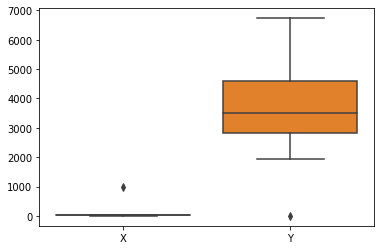

In [459]:
sns.boxplot(data=df)

In [460]:
ndf = df
upperx = df['X'].mean() + 3 * df['X'].std()
lowerx = df['X'].mean() - 3 * df['X'].std()
uppery = df['Y'].mean() + 3 * df['Y'].std()
lowery = df['Y'].mean() - 3 * df['Y'].std()

ndf = df[((df['X'] > lowerx) & (df['X'] < upperx)) | ((df['Y'] > lowerx) & (df['Y'] < upperx))]

print(ndf)

     X       Y
0   19  1927.0
1   19  2300.0
2   15  3487.5
3   16  5959.0
4   16  3487.5
5   19  4594.0
7   20  2879.0
8   21  3487.5
9    0  4096.0
10  19  6730.0
11  25     0.0
12   0  2792.0
13  33  2575.0
16  36  4580.0
17  40  5869.0
18  19  4178.0
19  45  3487.5


<AxesSubplot:>

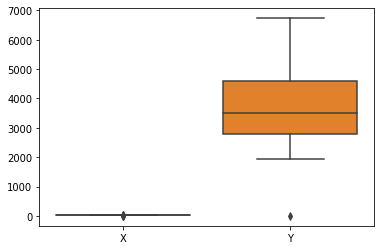

In [461]:
sns.boxplot(data=ndf)

MinMaxScaler()
[1. 1.]
[[0.42222222 0.28632987]
 [0.42222222 0.34175334]
 [0.33333333 0.51820208]
 [0.35555556 0.88543834]
 [0.35555556 0.51820208]
 [0.42222222 0.68261516]
 [0.44444444 0.42778603]
 [0.46666667 0.51820208]
 [0.         0.60861813]
 [0.42222222 1.        ]
 [0.55555556 0.        ]
 [0.         0.41485884]
 [0.73333333 0.38261516]
 [0.8        0.68053492]
 [0.88888889 0.87206538]
 [0.42222222 0.62080238]
 [1.         0.51820208]]


<AxesSubplot:>

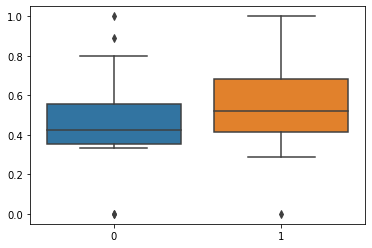

In [464]:
#tranform data using MinMaxScler
# print(df)
# print(ndf)
scaler = MinMaxScaler()
print(scaler.fit(ndf))
print(scaler.data_max_)
ndf = scaler.transform(ndf)
print(ndf)
# print(df)
sns.boxplot(data=ndf)

<AxesSubplot:>

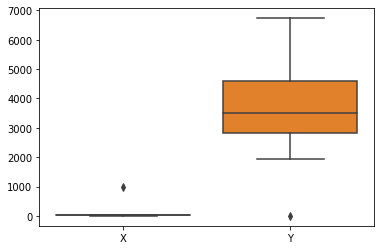

In [463]:
sns.boxplot(data=df)